# Setting up Grid Options and Checking

In [55]:
from coralModel import Reef, Organism, Ocean
import numpy as np
import matplotlib.pyplot as plt 

In [120]:
gridOption = 2 ## 0: random, 1: checkered, 2: blob

rows = 15
columns = 15

In [137]:
coralPercent = .50
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent

if gridOption == 1: #setup checkered
    m = rows + 2
    n = columns + 2
    checkerBoard = np.tile(np.array([[0,1,2],[1,2,0],[2,0,1]]), ((m+2)//3, (n+2)//3))
    
elif gridOption == 2: #setup blob
    
    blobValue = 0 #input system argument
    notBlob = [a for a in [0,1,2] if a != blobValue]
    
    center = (rows/2, columns/2)
    distanceGrid = np.array([Reef.distance([i+.5,j+.5], center)
                             for i in range(0,rows)
                             for j in range(0,columns)])
    maxDistance = np.sort(distanceGrid)[round(coralPercent*NumberOfNodes)]
    blobLocations = (np.where(distanceGrid.reshape(rows,columns) < maxDistance))
    blobLocations = [(blobLocations[0][n],blobLocations[1][n]) for n in range(0,len(blobLocations[0]))]

In [138]:
count = 0
threshold = 1.5
Moorea = Reef()
for i in range(0,rows):        
    for j in range(0,columns):
        if gridOption == 0:
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])                    
        elif gridOption == 1:
            U = checkerBoard[i,j]
        elif gridOption == 2:
            if (i,j) in blobLocations: 
                U = blobValue
            else:
                U = np.random.choice(notBlob,
                                     p=[.5, .5])                    
        node = Organism(type=U, location=[i,j], ID=count)
        Moorea.append(node)
        count = count + 1            
Moorea.generateGraph(threshold)

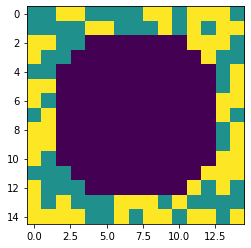

In [139]:
plt.figure()
plt.imshow(np.reshape(np.array([Moorea.nodes[i].type for 
                                i,val in enumerate(Moorea.nodes)]),
                      (rows,columns)))

# How to parallelize

In [5]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':

    with Pool(5) as p:
        print(p.map(f, [1, 2, 3])) #function, argument

[1, 4, 9]


In [91]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from coralModel import Reef, Organism, Ocean
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from multiprocessing import Pool


In [92]:
%%time
## Parameters
nProcessors = 4
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 
a=.2
y=.75
g=.4

## Time and Grid Settings

NumberOfSimulations = 10
tf, dt= 200, .1 
NumberOfTimesteps = int(tf/dt)

rows, columns = 15, 15
NumberOfNodes = rows * columns

data = np.zeros((NumberOfTimesteps, NumberOfNodes))

def runModel(simulation):
    print('running simulation' + str(simulation))
    Moorea = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1            
    Moorea.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        for i,val in enumerate(Moorea.nodes):
            data[n,i] = Moorea.nodes[i].type
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)
    
    if simulation == 0: ## check on progress
        plt.figure()
        plt.imshow(np.reshape(np.array([Moorea.nodes[i].type for
                                        i,val in enumerate(Moorea.nodes)]),(rows,columns)))
    return(data)
        
if __name__ == '__main__':
    
    with Pool(nProcessors) as p:
        results = p.map(runModel, np.arange(NumberOfSimulations))


running simulation0
running simulation1
running simulation3
running simulation2
running simulation4
running simulation5
running simulation6
running simulation7
running simulation8
running simulation9
CPU times: user 73.6 ms, sys: 133 ms, total: 207 ms
Wall time: 18.3 s


### Format of results under parallelization

In [7]:
results[2][2,2]

1.0

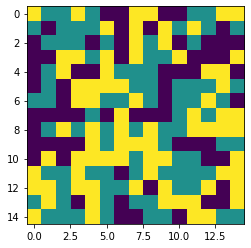

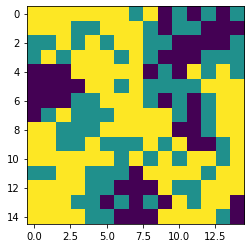

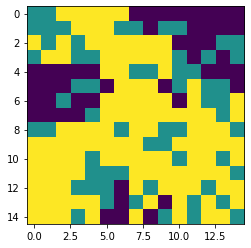

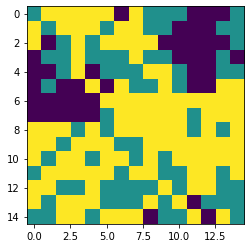

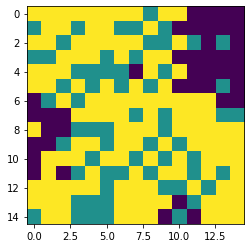

In [14]:
for i in np.arange(0,500,100):
    plt.figure()
    plt.imshow(np.reshape(results[5][i,:],(15,15)))

# Possible Extractions

#### Currently
* Number of Patches done via `patchCounts(sim,rows)`
* Species count via  `np.count_nonzero(step==2)` (currently written in as "sim"


#### Other table
* Want something that includes summary (age of coral death or algae death)



In [16]:
results[2].shape

(2000, 225)

In [20]:
results[2][1,:].shape

(225,)

## Number of Each Species 

63 77 85


225

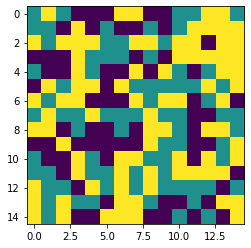

In [49]:
image = results[2][20,:]
plt.imshow(shaper(image,rows))
print(np.count_nonzero(image==0),
      np.count_nonzero(image==1),
      np.count_nonzero(image==2))
63+77+85

## Number of Patches Count

[[1. 2. 1. 0. 0. 0. 2. 2. 0. 0. 1. 1. 2. 2. 1.]
 [1. 1. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 0. 2. 2.]
 [0. 0. 0. 2. 1. 1. 1. 0. 1. 0. 2. 2. 2. 2. 2.]
 [1. 0. 0. 2. 1. 0. 0. 2. 0. 2. 1. 0. 1. 2. 2.]
 [0. 2. 1. 2. 2. 0. 2. 1. 1. 1. 1. 1. 2. 1. 2.]
 [2. 1. 2. 2. 0. 0. 0. 2. 1. 2. 2. 0. 1. 2. 0.]
 [1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 0. 0. 1. 1.]
 [2. 2. 0. 1. 0. 0. 1. 0. 2. 2. 1. 0. 2. 2. 1.]
 [0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 1. 2.]
 [1. 0. 0. 2. 1. 0. 2. 2. 1. 1. 2. 0. 2. 1. 2.]
 [1. 1. 0. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 0. 2. 1. 2. 1. 2. 1. 1. 1. 1. 0. 1.]
 [2. 1. 2. 1. 1. 0. 2. 2. 1. 0. 0. 1. 0. 2. 2.]
 [2. 1. 2. 0. 0. 2. 2. 2. 0. 0. 1. 0. 1. 0. 2.]]
10 1 9 11


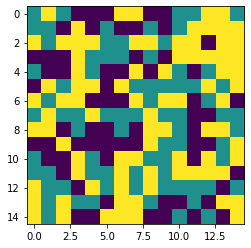

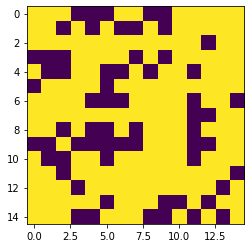

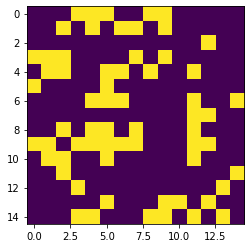

In [41]:
from ripser import ripser, lower_star_img

def shaper(df, rows):
    df = np.reshape(df, (-1, rows))
    return(df)

def binary(df,ones='coral'):
    with np.errstate(divide='ignore',invalid='ignore'):
        if ones == 'coral':
            df = np.nan_to_num(df/df)
        elif ones == 'turf':
            df = (df-1)**2
        elif ones == 'macro':
            df = np.nan_to_num((df-2)**2/(df-2)**2)
    return(df)

def tdaPrep(df, rows, ones='coral'):
    df = binary(df,ones)
    dfi = 1-df   
    df = shaper(df,rows)
    dfi = shaper(dfi,rows)
    return(df, dfi)


def patchCounts(image, rows):

# TDA measure for coral:
    df, dfi = tdaPrep(image, rows, ones='coral')
    countCoralPatches = len(lower_star_img(df))
    countAlgaePatches = len(lower_star_img(dfi))

# TDA meaure for turf:
    df, dfi = tdaPrep(image, rows, ones='turf')
    countTurfPatches = len(lower_star_img(df))

# TDA measure for macroalgae:
    df, dfi = tdaPrep(image, rows, ones='macro')
    countMacroPatches = len(lower_star_img(df))
    
    return(countCoralPatches, countAlgaePatches, countTurfPatches, countMacroPatches)


print(shaper(image,rows))

CP,AP,TP, MP = patchCounts(image, rows)
print(CP,AP,TP, MP)

df,dfi = tdaPrep(image,rows, ones='coral')
plt.figure()
plt.imshow(shaper(image,rows))
plt.figure()
plt.imshow(df)
plt.figure()
plt.imshow(dfi)

## Automate

In [ ]:
timestepsOfInterest = np.arange(0,500,20)
simulationsOfInterest = np.arange(0,500,20)



numberOfObservations = len(simulationsOfInterest) * len(timestepsOfInterest)

CP = np.zeros(numberOfObservations)
AP = np.zeros(numberOfObservations)
TP = np.zeros(numberOfObservations)
MP = np.zeros(numberOfObservations)
Msim = np.zeros(numberOfObservations)
Tsim = np.zeros(numberOfObservations)
Csim = np.zeros(numberOfObservations)
CNsim = np.zeros(numberOfObservations)
CNrsim = np.zeros(numberOfObservations)
observation = np.empty(numberOfObservations, dtype="<U10")
simulation_rec = np.empty(numberOfObservations, dtype="<U10")
timestep_rec = np.empty(numberOfObservations, dtype="<U10")

# Other

In [46]:
inputs = np.arange(0,8,.01)
outputs = np.zeros(len(inputs))
count = 0
for dist in inputs:
    coralNodeLocations = (np.where(distanceGrid < dist))
    coralNodeLocations = [(coralNodeLocations[0][n],coralNodeLocations[1][n]) 
                          for n in range(0,len(coralNodeLocations[0]))]
    ### Sudo Making of Initial Reef
    grid = np.zeros((rows,columns))
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            grid[i,j] = U
    outputs[count] = len(coralNodeLocations)
    count = count + 1

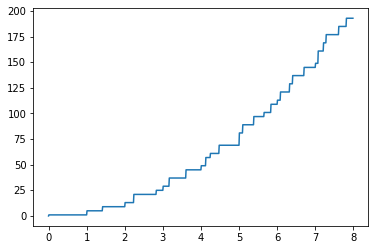

In [47]:
plt.figure()
plt.plot(inputs,outputs)